# Train Data Cleaning

## Importing modules and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')
sns.set_palette('viridis')

In [2]:
train = '../data/train.csv'
weather = '../data/weather.csv'
spray = '../data/spray.csv'

In [3]:
train = pd.read_csv(train)
weather = pd.read_csv(weather)
spray = pd.read_csv(spray)

In [4]:
train.shape

(10506, 12)

In [5]:
train.columns = train.columns.map(lambda x: x.lower())

In [6]:
max(train.trap.value_counts())

750

#### Date

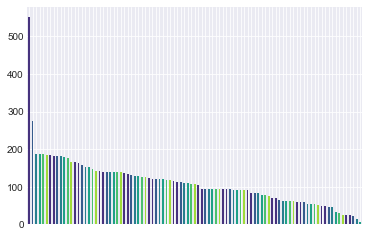

In [16]:
pd.value_counts(train['date'].values, sort=True).plot.bar()
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False) 

#### Species

Since there are 4 species with low value counts, we collapsed those species into one 'Other' category.

In [8]:
train.species.value_counts()

CULEX PIPIENS/RESTUANS    4752
CULEX RESTUANS            2740
CULEX PIPIENS             2699
CULEX TERRITANS            222
CULEX SALINARIUS            86
CULEX TARSALIS               6
CULEX ERRATICUS              1
Name: species, dtype: int64

In [9]:
train.species = train.species.map({'CULEX PIPIENS/RESTUANS': 'CULEX PIPIENS/RESTUANS',
                   'CULEX RESTUANS': 'CULEX RESTUANS',
                   'CULEX PIPIENS': 'CULEX PIPIENS',
                   'CULEX TERRITANS': 'CULEX OTHER', 
                   'CULEX SALINARIUS': 'CULEX OTHER',
                   'CULEX TARSALIS': 'CULEX OTHER',
                   'CULEX ERRATICUS': 'CULEX OTHER'})

In [10]:
train.species.value_counts()

CULEX PIPIENS/RESTUANS    4752
CULEX RESTUANS            2740
CULEX PIPIENS             2699
CULEX OTHER                315
Name: species, dtype: int64

#### Address Accuracy

In [11]:
train.addressaccuracy.value_counts()

8    4628
9    3980
5    1807
3      91
Name: addressaccuracy, dtype: int64

#### Number of Mosquitos

Text(0,0.5,'Count')

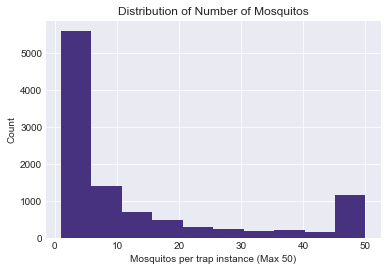

In [12]:
train.nummosquitos.hist()
plt.title('Distribution of Number of Mosquitos')
plt.xlabel('Mosquitos per trap instance (Max 50)')
plt.ylabel('Count')

#### WNV Presence

This allows use to establish the baseline accuracy of classification models.

In [13]:
train.wnvpresent.value_counts()

0    9955
1     551
Name: wnvpresent, dtype: int64

In [14]:
train.wnvpresent.mean()

0.05244622120692937

## Exporting to csv

In [15]:
train.to_csv('../data/train_cleaned.csv', index=False)